In [220]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

Création des fonctions : 

In [221]:
def A(pN,pM, Xi,m):
    p1 = pN-Xi*(pM-pN)
    pm = pM+Xi*(pM-pN)
    A = []
    for i in range (1,m+1):
        new = p1 + (i-1)*(pm-p1)/m
        A.append(new)
    return A

In [222]:
def S(A): 
    S = []
    for i in range (len(A)):
        for j in range (len(A)): 
            S.append([A[i],A[j]])
    return S
    

In [223]:
def pi1(s): 
    return (s[0]-1)*np.exp(4*(2-s[0]))/(np.exp(4*(2-s[0]))+np.exp(4*(2-s[1]))+1)

In [224]:
def pi2(s): 
    return (s[1]-1)*np.exp(4*(2-s[1]))/(np.exp(4*(2-s[1]))+np.exp(4*(2-s[0]))+1)

In [225]:
def initQwithLargeConstantValue(Q): 
    for i in range (len(Q)):
        for j in range(len(Q[0])):
            Q[i][j]=2
    return Q

In [226]:
#Créer une fonction qui trouve le maximum de Q(s,a)
def trouve_max(Q,s_prime):
    sol = Q[0][s_prime]
    arg = 0
    for i in range (1,len(Q)): 
        if sol <= Q[i][s_prime]:
            sol = Q[i][s_prime]
            arg = i
    return sol, arg        

In [227]:
def epsilon(beta,t):
    #return the value of epsilon at the moment t
    return np.exp(-beta*t)

In [228]:
#current_column_index = index of the price set by the players in t-1
def get_next_action(Q,s_t_index,epsilon,m,trouve_max):
    if np.random.random() < 1-epsilon: 
        return trouve_max(Q,s_t_index)[1]
    else: 
        return np.random.randint(m)

In [229]:
def updateQ(Q,S,a_t_index, s_t_index, alpha, delta, pi, s_t1_index):
    Qbis = Q
    for i in range(len(Q)): 
        for j in range(len(Q[0])):
            if i == a_t_index and j == s_t_index: #faire attention à différencier valeurs et indices : ici on parle d'indice
                Qbis[i][j]= (1-alpha)*Q[i][j] + alpha*(pi(S[s_t1_index]) + delta*trouve_max(Q,s_t1_index)[0])
    return Qbis

In [230]:
def find_index(S,s_t): 
    index = -1
    for test in range (len(S)):
        if abs(S[test][0] - s_t[0]) <= 10**(-100) and abs(S[test][1] - s_t[1]) <= 10**(-100) :
            index = test 
    return index

In [231]:
def jeu(pN,pM,Xi,m, A, S, epsilon, beta, alpha, delta, initQ, updateQ, nb_iteration, get_next_action,trouve_max,pi1,pi2, find_index):
    #Initialisation
    A = A(pN,pM, Xi,m)
    S = S(A)
    Q1 = np.zeros((len(A),len(S))) #Q matrice j1
    Q1 = initQ(Q1)
    Q2 = np.zeros((len(A),len(S))) #Q matrice j2
    Q2 = initQ(Q2)
    s_t_index = np.random.randint(m*m)
    temps = []
    profit = []
    
    #Phase itérative
    for t in range(nb_iteration):
        a_t_index1 = get_next_action(Q1,s_t_index,epsilon(beta,t),m,trouve_max)
        a_t_index2 = get_next_action(Q2,s_t_index,epsilon(beta,t),m,trouve_max)
        #print(a_t_index1,a_t_index2)
        s_t1 = [A[a_t_index1],A[a_t_index2]]
        profit1 = pi1(s_t1)
        s_t1_index = find_index(S,s_t1)
        Q1 = updateQ(Q1,S, a_t_index1, s_t_index, alpha, delta, pi1, s_t1_index)
        #print(Q1[a_t_index1,s_t_index])
        Q2 = updateQ(Q2,S,a_t_index2, s_t_index, alpha, delta, pi2, s_t1_index)
        s_t_index = s_t1_index
        temps.append(t)
        profit.append(profit1)
        
        
    return S[s_t1_index], temps, profit
    

Test des différentes fonctions

In [232]:
A_test = A(1.78,2,0.1,15)
print(A_test)

[1.758, 1.7756, 1.7932, 1.8108, 1.8284, 1.8459999999999999, 1.8636, 1.8812, 1.8987999999999998, 1.9163999999999999, 1.934, 1.9515999999999998, 1.9691999999999998, 1.9868, 2.0044]


In [233]:
len(A_test)

15

In [234]:
S_test = S(A_test)
print(S_test)

[[1.758, 1.758], [1.758, 1.7756], [1.758, 1.7932], [1.758, 1.8108], [1.758, 1.8284], [1.758, 1.8459999999999999], [1.758, 1.8636], [1.758, 1.8812], [1.758, 1.8987999999999998], [1.758, 1.9163999999999999], [1.758, 1.934], [1.758, 1.9515999999999998], [1.758, 1.9691999999999998], [1.758, 1.9868], [1.758, 2.0044], [1.7756, 1.758], [1.7756, 1.7756], [1.7756, 1.7932], [1.7756, 1.8108], [1.7756, 1.8284], [1.7756, 1.8459999999999999], [1.7756, 1.8636], [1.7756, 1.8812], [1.7756, 1.8987999999999998], [1.7756, 1.9163999999999999], [1.7756, 1.934], [1.7756, 1.9515999999999998], [1.7756, 1.9691999999999998], [1.7756, 1.9868], [1.7756, 2.0044], [1.7932, 1.758], [1.7932, 1.7756], [1.7932, 1.7932], [1.7932, 1.8108], [1.7932, 1.8284], [1.7932, 1.8459999999999999], [1.7932, 1.8636], [1.7932, 1.8812], [1.7932, 1.8987999999999998], [1.7932, 1.9163999999999999], [1.7932, 1.934], [1.7932, 1.9515999999999998], [1.7932, 1.9691999999999998], [1.7932, 1.9868], [1.7932, 2.0044], [1.8108, 1.758], [1.8108, 1.77

In [235]:
print([S_test[90],pi1(S_test[90]),pi2(S_test[90])])

[[1.8636, 1.758], 0.2781219563171084, 0.37242415125100253]


In [236]:
Q = np.zeros((len(A_test),len(S_test)))
Q = initQwithLargeConstantValue(Q)
print(Q)

[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


In [237]:
Q = [[1,2,3],[4,5,6],[7,8,9]]
trouve_max(Q,0)

(7, 2)

In [238]:
for t in range (10): 
    print(epsilon(10**(-5),t))

1.0
0.9999900000499998
0.9999800001999987
0.9999700004499955
0.9999600007999894
0.9999500012499791
0.999940001799964
0.9999300024499428
0.9999200031999147
0.9999100040498785


In [239]:
Q = [[1,2,3],[4,5,6],[7,8,9]]
print(get_next_action(Q,1,0.5,15,trouve_max))

2


In [240]:
Q = np.zeros((len(A_test),len(S_test)))
Q = initQwithLargeConstantValue(Q)
#print(updateQ(Q,S_test,2,2, 0.1, 0.95, pi, np.random.randint(225))) #Ca change bien quand on change s_t1_index

In [241]:
#for i in range (len(S)):
    #print(i,find_index(S,S[i])) 
for i in range (len(S_test)):
    if i != find_index(S_test,S_test[i]):
        print(i,find_index(S_test,S_test[i])) 
        print(S_test[i],S_test[find_index(S_test,S_test[i])]) #on doit rien print 

In [242]:
results1 = jeu(pN=1.47,pM=1.93,Xi=0.1,m=15, A=A, S=S, epsilon = epsilon, beta=10**(-5), alpha = 0.1, delta = 0.95, initQ=initQwithLargeConstantValue, updateQ=updateQ, nb_iteration=1000000, get_next_action = get_next_action,trouve_max=trouve_max,pi1=pi1, pi2=pi2, find_index=find_index)

In [243]:
results2 = jeu(pN=1.47,pM=1.93,Xi=0.1,m=15, A=A, S=S, epsilon = epsilon, beta=10**(-5), alpha = 0.1, delta = 0.95, initQ=initQwithLargeConstantValue, updateQ=updateQ, nb_iteration=1000000, get_next_action = get_next_action,trouve_max=trouve_max,pi1=pi1, pi2=pi2, find_index=find_index)

In [244]:
results3 = jeu(pN=1.47,pM=1.93,Xi=0.1,m=15, A=A, S=S, epsilon = epsilon, beta=10**(-5), alpha = 0.1, delta = 0.95, initQ=initQwithLargeConstantValue, updateQ=updateQ, nb_iteration=1000000, get_next_action = get_next_action,trouve_max=trouve_max,pi1=pi1, pi2=pi2, find_index=find_index)

Pour 
- 100 rep : < 1sec
- 1000 rep : < 1 sec
- 10000 rep : env. 4 sec
- 100000 rep : env. 40 sec
- 1000000 rep : env. 7mn

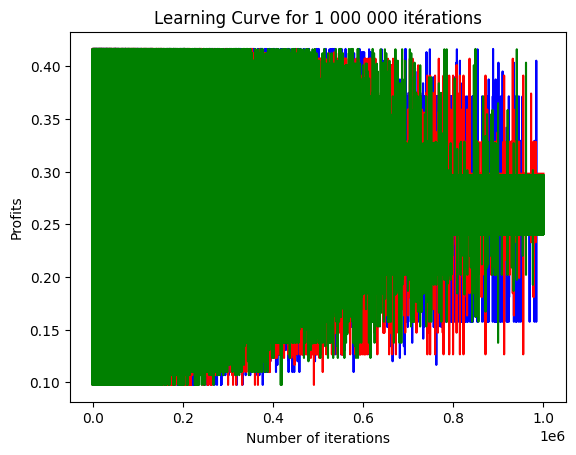

In [246]:
plt.title("Learning Curve for 1 000 000 itérations")
plt.plot(results1[1], results1[2], "b", label = "Simulation 1")
plt.plot(results2[1], results2[2], "r", label = "Simulation 2")
plt.plot(results3[1], results3[2], "g", label = "Simulation 3")
plt.xlabel('Number of iterations')
plt.ylabel('Profits')
plt.show()